In [1]:
import numpy as np
import astropy.io.fits as pf
from astropy.table import Table, vstack
import pylab as mplot
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/chihway/.conda/envs/shear_decade/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['vstack']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
new = Table.read('metacal_test.fits')

In [3]:
new.info()

<Table length=1481545>
         name          dtype  shape 
--------------------- ------- ------
                   id   int64       
                    x float64       
                    y float64       
           mcal_flags   int64       
            good_frac float64       
   mcal_psf_g_noshear float64   (2,)
   mcal_psf_T_noshear float64       
    mcal_nfev_noshear   int32       
     mcal_s2n_noshear float64       
   mcal_s2n_r_noshear float64       
    mcal_pars_noshear float64   (8,)
mcal_pars_cov_noshear float64 (8, 8)
       mcal_g_noshear float64   (2,)
   mcal_g_cov_noshear float64 (2, 2)
       mcal_T_noshear float64       
   mcal_T_err_noshear float64       
 mcal_T_ratio_noshear float64       
    mcal_flux_noshear float64   (3,)
mcal_flux_cov_noshear float64 (3, 3)
mcal_flux_err_noshear float64   (3,)
         mcal_nfev_1p   int32       
          mcal_s2n_1p float64       
        mcal_s2n_r_1p float64       
         mcal_pars_1p float64   (8,)
     mcal_pars_

/tmp/ipykernel_4918/396992580.py:2: RuntimeWarning: invalid value encountered in log10
  mplot.hist2d(np.log10(new['mcal_s2n_noshear']),new['mcal_g_noshear'][:,0], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())


Text(0, 0.5, 'e1')

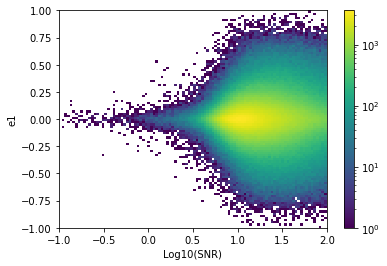

In [4]:
import matplotlib.colors as colors
mplot.hist2d(np.log10(new['mcal_s2n_noshear']),new['mcal_g_noshear'][:,0], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())
mplot.colorbar()
mplot.xlabel('Log10(SNR)')
mplot.ylabel('e1')


/tmp/ipykernel_4918/134063504.py:1: RuntimeWarning: invalid value encountered in log10
  mplot.hist2d(np.log10(new['mcal_s2n_noshear']),new['mcal_g_noshear'][:,1], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())


Text(0, 0.5, 'e2')

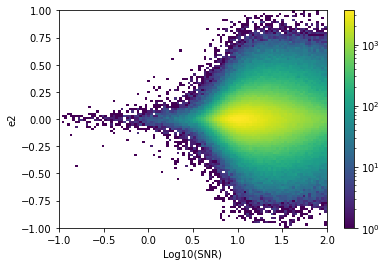

In [5]:
mplot.hist2d(np.log10(new['mcal_s2n_noshear']),new['mcal_g_noshear'][:,1], range=((-1,2), (-1,1)), bins=(100,100),norm=colors.LogNorm())
mplot.colorbar()
mplot.xlabel('Log10(SNR)')
mplot.ylabel('e2')


### Response for all

In [6]:
mask0 = (~((new['mcal_T_noshear']>2)*(new['mcal_s2n_noshear']<30)))*(new['mcal_T_noshear']<10)*(new['mcal_s2n_noshear']<1000)*(new['mcal_s2n_noshear']>10)*(new['mcal_T_ratio_noshear']>0.5)
mask_1p = (~((new['mcal_T_1p']>2)*(new['mcal_s2n_1p']<30)))*(new['mcal_T_1p']<10)*(new['mcal_s2n_1p']<1000)*(new['mcal_s2n_1p']>10)*(new['mcal_T_ratio_1p']>0.5)
mask_1m = (~((new['mcal_T_1m']>2)*(new['mcal_s2n_1m']<30)))*(new['mcal_T_1m']<10)*(new['mcal_s2n_1m']<1000)*(new['mcal_s2n_1m']>10)*(new['mcal_T_ratio_1m']>0.5)
mask_2p = (~((new['mcal_T_2p']>2)*(new['mcal_s2n_2p']<30)))*(new['mcal_T_2p']<10)*(new['mcal_s2n_2p']<1000)*(new['mcal_s2n_2p']>10)*(new['mcal_T_ratio_2p']>0.5)
mask_2m = (~((new['mcal_T_2m']>2)*(new['mcal_s2n_2m']<30)))*(new['mcal_T_2m']<10)*(new['mcal_s2n_2m']<1000)*(new['mcal_s2n_2m']>10)*(new['mcal_T_ratio_2m']>0.5)

# calcualte metacalibration factors
dgamma = 2*0.01

# add weights to everything

R11  = (np.mean(new['mcal_g_1p'][:,0][mask0]) - np.mean(new['mcal_g_1m'][:,0][mask0]))/dgamma
R11s = (np.mean(new['mcal_g_noshear'][:,0][mask_1p]) - np.mean(new['mcal_g_noshear'][:,0][mask_1m]))/dgamma
R11tot = R11 + R11s
print('R11_g', R11, 'R11_s', R11s)
print('R11 tot', R11tot)

R22  = (np.mean(new['mcal_g_2p'][:,1][mask0]) - np.mean(new['mcal_g_2m'][:,1][mask0]))/dgamma
R22s = (np.mean(new['mcal_g_noshear'][:,1][mask_2p]) - np.mean(new['mcal_g_noshear'][:,1][mask_2m]))/dgamma
R22tot = R22 + R22s
print('R22_g', R22, 'R22_s', R22s)
print('R22 tot', R22tot)

print(len(new['mcal_g_2p'][:,1][mask0])*1.0/(90*0.5*60*60))

R11_g 0.6877756054878961 R11_s 0.024025018858142944
R11 tot 0.711800624346039
R22_g 0.6785939855514995 R22_s 0.021822504697228975
R22 tot 0.7004164902487285
4.500685185185185


# Histogram everything

### Shear

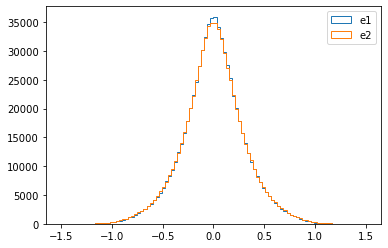

In [7]:
mplot.hist(new['mcal_g_noshear'][:,0][mask0]/R11tot, range=(-1.5,1.5), bins=100, histtype='step', label='e1')
mplot.hist(new['mcal_g_noshear'][:,1][mask0]/R22tot, range=(-1.5,1.5), bins=100, histtype='step', label='e2')

mplot.legend()

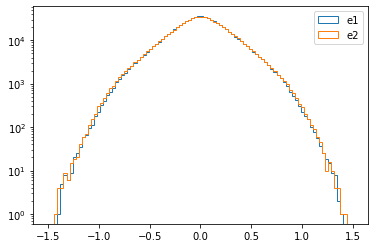

In [8]:
mplot.hist(new['mcal_g_noshear'][:,0][mask0]/R11tot, range=(-1.5,1.5), bins=100, histtype='step', label='e1')
mplot.hist(new['mcal_g_noshear'][:,1][mask0]/R22tot, range=(-1.5,1.5), bins=100, histtype='step', label='e2')
mplot.yscale('log')
mplot.legend()

### PSF ellipticity

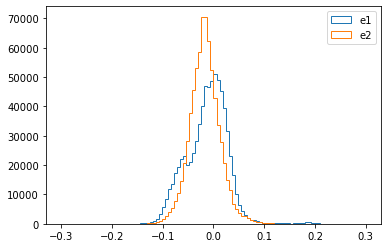

In [9]:
mplot.hist(new['mcal_psf_g_noshear'][:,0][mask0], range=(-0.3,0.3), bins=100, histtype='step', label='e1')
mplot.hist(new['mcal_psf_g_noshear'][:,1][mask0], range=(-0.3,0.3), bins=100, histtype='step', label='e2')

mplot.legend()

### PSF size

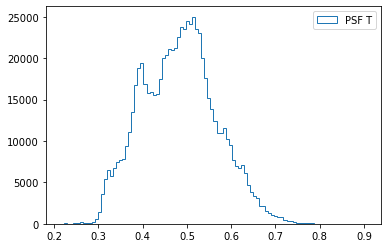

In [10]:
mplot.hist(new['mcal_psf_T_noshear'][mask0], bins=100, histtype='step', label='PSF T')

mplot.legend()

### S2N

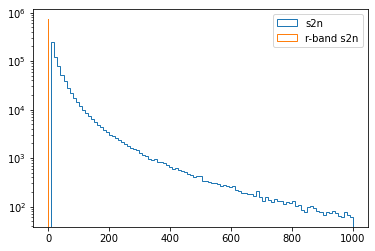

In [11]:
mplot.hist(new['mcal_s2n_noshear'][mask0], bins=100, histtype='step', label='s2n')
mplot.hist(new['mcal_s2n_r_noshear'][mask0], bins=100, histtype='step', label='r-band s2n')


mplot.yscale('log')
mplot.legend()

### Mcal parameters

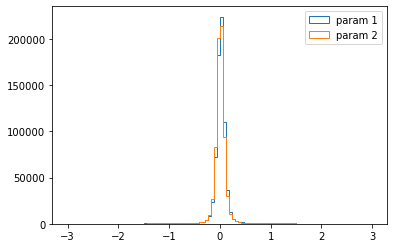

In [12]:
mplot.hist(new['mcal_pars_noshear'][:,0][mask0], range=(-3,3), bins=100, histtype='step', label='param 1')
mplot.hist(new['mcal_pars_noshear'][:,1][mask0], range=(-3,3), bins=100, histtype='step', label='param 2')

mplot.legend()


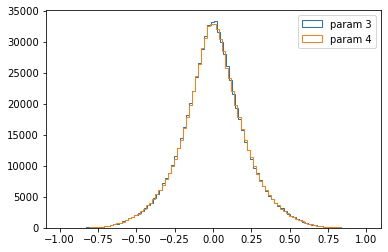

In [13]:
mplot.hist(new['mcal_pars_noshear'][:,2][mask0], bins=100, histtype='step', label='param 3')
mplot.hist(new['mcal_pars_noshear'][:,3][mask0], bins=100, histtype='step', label='param 4')

mplot.legend()


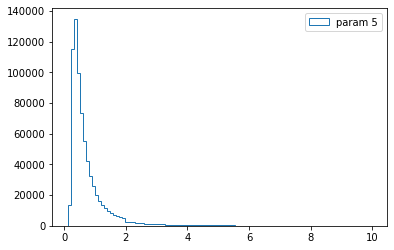

In [14]:
mplot.hist(new['mcal_pars_noshear'][:,4][mask0], bins=100, histtype='step', label='param 5')

mplot.legend()


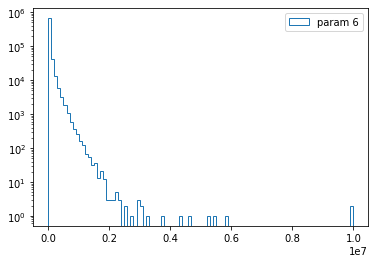

In [15]:
mplot.hist(new['mcal_pars_noshear'][:,5][mask0], bins=100, histtype='step', label='param 6')

mplot.yscale('log')
mplot.legend()


/tmp/ipykernel_4918/754100182.py:1: RuntimeWarning: invalid value encountered in log
  mplot.hist(np.log(new['mcal_pars_noshear'][:,6][mask0]), bins=100, histtype='step', label='log(param 7)')


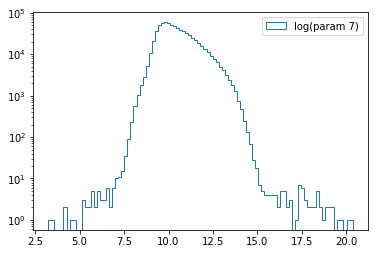

In [16]:
mplot.hist(np.log(new['mcal_pars_noshear'][:,6][mask0]), bins=100, histtype='step', label='log(param 7)')

mplot.yscale('log')
mplot.legend()


/tmp/ipykernel_4918/4201319692.py:1: RuntimeWarning: invalid value encountered in log
  mplot.hist(np.log(new['mcal_pars_noshear'][:,7][mask0]), bins=100, histtype='step', label='log(param 8)')


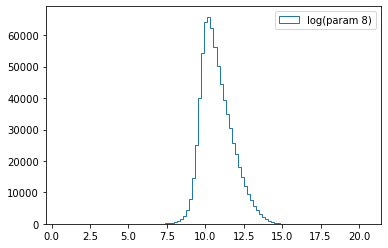

In [17]:
mplot.hist(np.log(new['mcal_pars_noshear'][:,7][mask0]), bins=100, histtype='step', label='log(param 8)')

mplot.legend()

### Size

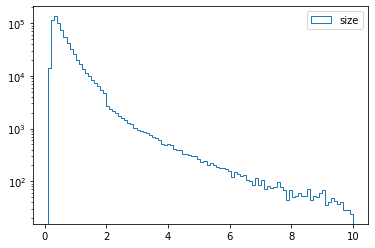

In [18]:
mplot.hist(new['mcal_T_noshear'][mask0], bins=100, histtype='step', label='size')

mplot.yscale('log')
mplot.legend()

### Size ratio

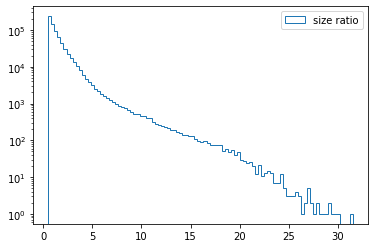

In [19]:
mplot.hist(new['mcal_T_ratio_noshear'][mask0], bins=100, histtype='step', label='size ratio')

mplot.yscale('log')
mplot.legend()



### Flux

/tmp/ipykernel_4918/3154153707.py:1: RuntimeWarning: invalid value encountered in log
  mplot.hist(np.log(new['mcal_flux_noshear'][mask0]), bins=100, histtype='step', label='flux')


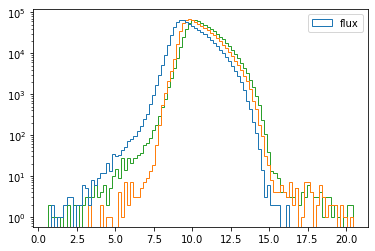

In [20]:
mplot.hist(np.log(new['mcal_flux_noshear'][mask0]), bins=100, histtype='step', label='flux')

mplot.yscale('log')
mplot.legend()


# Now start doing mean shear vs. X

In [21]:
def mask_default(cat):
    mask0_default = (~((cat['mcal_T_noshear']>2)*(cat['mcal_s2n_noshear']<30)))*(cat['mcal_T_noshear']<10)*(cat['mcal_s2n_noshear']<1000)*(cat['mcal_s2n_noshear']>10)*(cat['mcal_T_ratio_noshear']>0.5)
    mask_1p_default = (~((cat['mcal_T_1p']>2)*(cat['mcal_s2n_1p']<30)))*(cat['mcal_T_1p']<10)*(cat['mcal_s2n_1p']<1000)*(cat['mcal_s2n_1p']>10)*(cat['mcal_T_ratio_1p']>0.5)
    mask_1m_default = (~((cat['mcal_T_1m']>2)*(cat['mcal_s2n_1m']<30)))*(cat['mcal_T_1m']<10)*(cat['mcal_s2n_1m']<1000)*(cat['mcal_s2n_1m']>10)*(cat['mcal_T_ratio_1m']>0.5)
    mask_2p_default = (~((cat['mcal_T_2p']>2)*(cat['mcal_s2n_2p']<30)))*(cat['mcal_T_2p']<10)*(cat['mcal_s2n_2p']<1000)*(cat['mcal_s2n_2p']>10)*(cat['mcal_T_ratio_2p']>0.5)
    mask_2m_default = (~((cat['mcal_T_2m']>2)*(cat['mcal_s2n_2m']<30)))*(cat['mcal_T_2m']<10)*(cat['mcal_s2n_2m']<1000)*(cat['mcal_s2n_2m']>10)*(cat['mcal_T_ratio_2m']>0.5)

    return mask0_default, mask_1p_default, mask_1m_default, mask_2p_default, mask_2m_default


In [22]:
def get_Rs(cat, m0, m_1p, m_1m, m_2p, m_2m):
    
    # calcualte metacalibration factors
    dgamma = 2*0.01
    
    R11  = (np.mean(cat['mcal_g_1p'][:,0][m0]) - np.mean(cat['mcal_g_1m'][:,0][m0]))/dgamma
    R11s = (np.mean(cat['mcal_g_noshear'][:,0][m_1p]) - np.mean(cat['mcal_g_noshear'][:,0][m_1m]))/dgamma
    R11tot = R11 + R11s

    R22  = (np.mean(cat['mcal_g_2p'][:,1][m0]) - np.mean(cat['mcal_g_2m'][:,1][m0]))/dgamma
    R22s = (np.mean(cat['mcal_g_noshear'][:,1][m_2p]) - np.mean(cat['mcal_g_noshear'][:,1][m_2m]))/dgamma
    R22tot = R22 + R22s
    
    return R11tot, R22tot
    

In [23]:
def calibrate_bin_X(cat, tag, lim1, lim2):
    
    df0, df_1p, df_1m, df_2p, df_2m = mask_default(cat)
    
    mask0 = df0*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    mask_1p = df_1p*(cat[tag+'_1p']>lim1)*(cat[tag+'_1p']<=lim2)
    mask_1m = df_1m*(cat[tag+'_1m']>lim1)*(cat[tag+'_1m']<=lim2)
    mask_2p = df_2p*(cat[tag+'_2p']>lim1)*(cat[tag+'_2p']<=lim2)
    mask_2m = df_2m*(cat[tag+'_2m']>lim1)*(cat[tag+'_2m']<=lim2)
    
    R11tot, R22tot = get_Rs(cat, mask0, mask_1p, mask_1m, mask_2p, mask_2m)
    
    e1 = cat['mcal_g_noshear'][:,0][mask0]/R11tot
    e2 = cat['mcal_g_noshear'][:,1][mask0]/R22tot

    return np.mean(e1), np.mean(e2),np.std(e1)/np.sqrt(len(e1)), np.std(e2)/np.sqrt(len(e2)),len(e1), len(e2)


In [24]:
def calibrate_bin_Y(cat, tag, lim1, lim2):
    
    df0, df_1p, df_1m, df_2p, df_2m = mask_default(cat)
    
    mask0 = df0*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    mask_1p = df_1p*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    mask_1m = df_1m*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    mask_2p = df_2p*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    mask_2m = df_2m*(cat[tag+'_noshear']>lim1)*(cat[tag+'_noshear']<=lim2)
    
    R11tot, R22tot = get_Rs(cat, mask0, mask_1p, mask_1m, mask_2p, mask_2m)
    
    e1 = cat['mcal_g_noshear'][:,0][mask0]/R11tot
    e2 = cat['mcal_g_noshear'][:,1][mask0]/R22tot

    return np.mean(e1), np.mean(e2),np.std(e1)/np.sqrt(len(e1)), np.std(e2)/np.sqrt(len(e2)),len(e1), len(e2)


In [25]:
def calibrate_bin_Z(cat, tag, n, lim1, lim2):
    
    df0, df_1p, df_1m, df_2p, df_2m = mask_default(cat)
    
    mask0 = df0*(cat[tag+'_noshear'][:,n]>lim1)*(cat[tag+'_noshear'][:,n]<=lim2)
    mask_1p = df_1p*(cat[tag+'_noshear'][:,n]>lim1)*(cat[tag+'_noshear'][:,n]<=lim2)
    mask_1m = df_1m*(cat[tag+'_noshear'][:,n]>lim1)*(cat[tag+'_noshear'][:,n]<=lim2)
    mask_2p = df_2p*(cat[tag+'_noshear'][:,n]>lim1)*(cat[tag+'_noshear'][:,n]<=lim2)
    mask_2m = df_2m*(cat[tag+'_noshear'][:,n]>lim1)*(cat[tag+'_noshear'][:,n]<=lim2)
    
    R11tot, R22tot = get_Rs(cat, mask0, mask_1p, mask_1m, mask_2p, mask_2m)
    
    e1 = cat['mcal_g_noshear'][:,0][mask0]/R11tot
    e2 = cat['mcal_g_noshear'][:,1][mask0]/R22tot

    return np.mean(e1), np.mean(e2),np.std(e1)/np.sqrt(len(e1)), np.std(e2)/np.sqrt(len(e2)),len(e1), len(e2)


### Mean shear vs. SNR

In [26]:
XX = []
SNR = []
for i in range(20):
    snr1 = 10**(1+i*0.1)
    snr2 = 10**(1+i*0.1+0.1)
    X = calibrate_bin_X(new, 'mcal_s2n', snr1, snr2)
    XX.append(X)
    SNR.append(10**(1+i*0.1+0.05))
XX = np.array(XX)

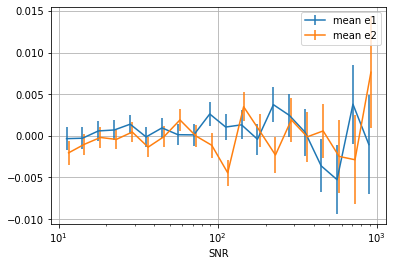

In [27]:
SNR = np.array(SNR)
mplot.errorbar(SNR, XX[:,0], XX[:,2], label='mean e1')
mplot.errorbar(SNR*1.03, XX[:,1], XX[:,3], label='mean e2')

mplot.xscale('log')
mplot.xlabel('SNR')
mplot.legend()
mplot.grid()

### Mean shear vs. size ratio

In [28]:
XX = []
Size = []
for i in range(15):
    size1 = 0.5+0.2*i
    size2 = 0.5+0.2*i+0.2
    X = calibrate_bin_X(new, 'mcal_T_ratio', size1, size2)
    XX.append(X)
    Size.append(0.5+0.2*i+0.1)
XX = np.array(XX)

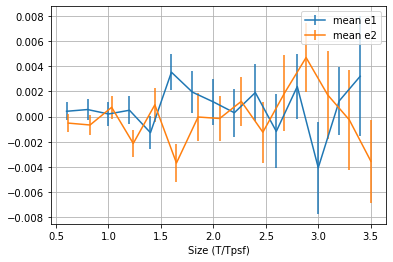

In [29]:
Size = np.array(Size)
mplot.errorbar(Size, XX[:,0], XX[:,2], label='mean e1')
mplot.errorbar(Size*1.03, XX[:,1], XX[:,3], label='mean e2')

mplot.xlabel('Size (T/Tpsf)')
mplot.legend()
mplot.grid()

### Mean shear vs. PSF size

In [30]:
XX = []
Size = []
for i in range(10):
    size1 = 0.3+0.04*i
    size2 = 0.3+0.04*i+0.04
    X = calibrate_bin_Y(new, 'mcal_psf_T', size1, size2)
    XX.append(X)
    Size.append(0.3+0.04*i+0.02)
XX = np.array(XX)

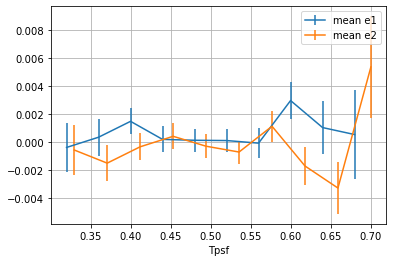

In [31]:
Size = np.array(Size)
mplot.errorbar(Size, XX[:,0], XX[:,2], label='mean e1')
mplot.errorbar(Size*1.03, XX[:,1], XX[:,3], label='mean e2')

mplot.xlabel('Tpsf')
mplot.legend()
mplot.grid()

### PSF e1, e2

In [32]:
XX = []
E1 = []
for i in range(20):
    ee1 = -0.1+0.01*i
    ee2 = -0.1+0.01*i+0.01
    X = calibrate_bin_Z(new, 'mcal_psf_g', 0, ee1, ee2)
    XX.append(X)
    E1.append(-0.1+0.01*i+0.005)
XX = np.array(XX)

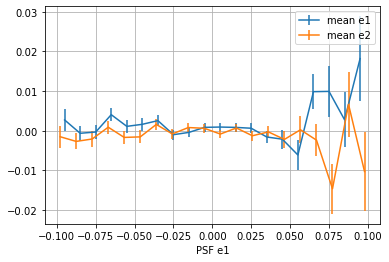

In [33]:
E1 = np.array(E1)
mplot.errorbar(E1, XX[:,0], XX[:,2], label='mean e1')
mplot.errorbar(E1*1.03, XX[:,1], XX[:,3], label='mean e2')

mplot.xlabel('PSF e1')
mplot.legend()
mplot.grid()

In [34]:
XX = []
E2 = []
for i in range(20):
    ee1 = -0.1+0.01*i
    ee2 = -0.1+0.01*i+0.01
    X = calibrate_bin_Z(new, 'mcal_psf_g', 1, ee1, ee2)
    XX.append(X)
    E2.append(-0.1+0.01*i+0.005)
XX = np.array(XX)

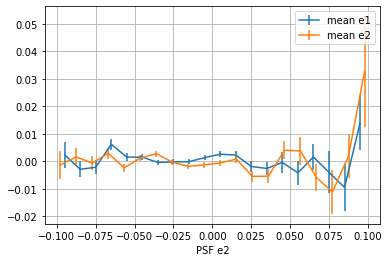

In [35]:
E2 = np.array(E2)
mplot.errorbar(E2, XX[:,0], XX[:,2], label='mean e1')
mplot.errorbar(E2*1.03, XX[:,1], XX[:,3], label='mean e2')

mplot.xlabel('PSF e2')
mplot.legend()
mplot.grid()